In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

In [3]:
generator_model = tf.keras.models.load_model('Models/Generator_Epoch=2_Step=LastStep')
discriminator_model = tf.keras.models.load_model('Models/Discriminator_Epoch=2_Step=LastStep')

In [4]:
def get_one_hot_tensors(classification_labels_batch):
    # Get the one_hot vector for noise
    one_hot_vector = tf.one_hot(classification_labels_batch, depth=2)
    # Get the one_hot_filters
    one_hot_filters = tf.expand_dims(tf.expand_dims(one_hot_vector, axis=-1), axis=-1)
    one_hot_filters = tf.reshape(one_hot_filters,shape=(one_hot_filters.shape[0],1,1,one_hot_filters.shape[1]))
    one_hot_filters = tf.tile(one_hot_filters, [1, 128, 128, 1])
    return one_hot_vector, one_hot_filters

In [5]:
noise_dimensions = 128
def create_image(certainty, classification_label):
    classification_label = [classification_label]
    class_string = "Male" if classification_label[0] == 1 else "Female"
    one_hot_vector, one_hot_filters = get_one_hot_tensors(classification_labels_batch=classification_label)
    
    while True:
        #Create noise and generate a image using the generator
        noise = tf.random.normal(shape=[1, noise_dimensions])
        noise = tf.concat([noise, one_hot_vector], axis= -1)
        generated_tensor = generator_model(noise)  
        image_tensor = tf.concat([generated_tensor, one_hot_filters], axis = -1)
        prediction = discriminator_model(image_tensor)
        if prediction > certainty:
            break            
        pass      
       
    
    test_image = tf.squeeze(generated_tensor)
    test_image = test_image*0.5 + 0.5
    plt.imshow(test_image)
    plt.title(f"Class  {class_string}")
    plt.show()
    pass

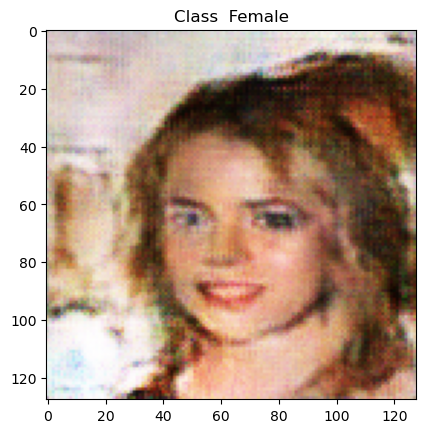

In [19]:
#As it is a conditional GAN, you are able to select a feature, in this case it is gender
create_image(0.9, 0) #0 is class for women


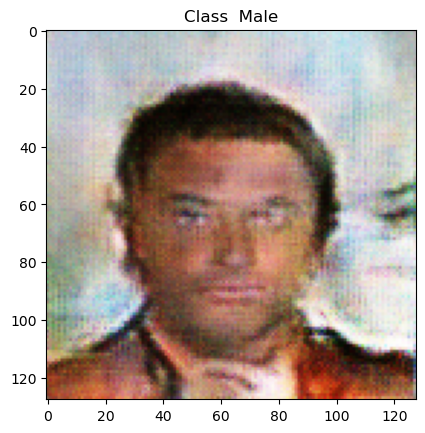

In [42]:
create_image(0.9, 1) #1 is class for men